In [1]:
import numpy
import matplotlib.pyplot as plt

import sys

import getpass

username = getpass.getuser()

sys.path.append('/Users/{}/Documents/Reference/G/github/sidpy/sidpy'.format(username))

from sidpy import *

from mpl_toolkits.mplot3d import Axes3D

import matplotlib
import matplotlib.cm as cmx
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 18)

In [2]:
x = numpy.loadtxt('../example-data/data-shenon/x.dat', delimiter = ',')[:, 0]
y = numpy.loadtxt('../example-data/data-shenon/y.dat', delimiter = ',')[:, 0]

x = x.reshape(1, -1)
y = y.reshape(1, -1)

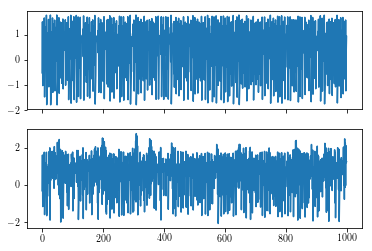

In [3]:
fig, ax = plt.subplots(2, 1, sharex = True)

ax[0].plot(x[0, :1000])
ax[1].plot(y[0, :1000])

In [4]:
p_max = 5

p_opt, mse_opt, mse_by_p, kstar_by_p = choose_model_order_mse(x, p_max, pow_upperbound = 0.5, nn_package = 'sklearn', is_multirealization = True, announce_stages = False, output_verbose = True)

For p = 1, chose k* = 280 with MSE(k*) = 0.0751959733775
####################################################
# Warning: For p = 1, Nelder-Mead is choosing k* near k_upper = 283.
# Increase pow_upperbound.
####################################################
For p = 2, chose k* = 7 with MSE(k*) = 2.42637722457e-05
For p = 3, chose k* = 4 with MSE(k*) = 3.03692101363e-05
For p = 4, chose k* = 4 with MSE(k*) = 4.00214341975e-05
For p = 5, chose k* = 4 with MSE(k*) = 5.25291405159e-05


In [5]:
q = 1
delay = 0

lTEs, TE = estimate_lte(y, x, q, p_opt, delay, k = 5)

print 'The estimated Total Transfer Entropy is {}'.format(TE)

The estimated Total Transfer Entropy is -0.0365042371348


In [ ]:
lTEs = lTEs.reshape(1, -1)

print x.shape, y.shape, lTEs.shape

(1, 80000) (1, 80000) (1, 80000)


In [ ]:
sTEs = estimate_ste(y, x, q, p_opt, delay, lTEs, pow_neighbors = 0.5, verbose = False)

In [ ]:
lTEs.shape

In [ ]:
fig, ax = plt.subplots(4, 1, sharex = True)

ax[0].plot(x[0, :1000])
ax[1].plot(y[0, :1000])
ax[2].plot(lTEs[0, :1000])
ax[3].plot(sTEs[0, :1000])
